# Praca domowa 2
### Klaudia Gruszkowska

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# wczytanie danych 
allegro_df = pd.read_csv('allegro-api-transactions.csv')

# pierwsze kilku wierszy
allegro_df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [5]:
allegro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [11]:
allegro_df['it_location'].value_counts()

Warszawa                        23244
Kraków                          15135
Łódź                            10935
Poznań                          10610
Wrocław                          8646
                                ...  
Warszawa 696 512 500                1
Trakt Brzeski 142, Sulejówek        1
Ostrów Wielkopolski, Radłów         1
Gąbn                                1
wodzislaw ślaski                    1
Name: it_location, Length: 10056, dtype: int64

## 1. Kodowanie zmiennych kategorycznych

In [40]:
from category_encoders import TargetEncoder
from category_encoders import OneHotEncoder
from category_encoders import CountEncoder
from category_encoders import OrdinalEncoder

In [10]:
allegro_df['price'].value_counts()

1.00      7904
9.99      4441
19.99     4201
99.00     3583
15.00     3393
          ... 
263.95       1
28.52        1
46.21        1
26.19        1
216.48       1
Name: price, Length: 9722, dtype: int64

In [7]:
encoder = TargetEncoder()

In [13]:
allegro_df['it_location_encoded'] = encoder.fit_transform (allegro_df['it_location'], allegro_df['price'])

In [14]:
allegro_df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,it_location_Encoded
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery,85.423398
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki",85.423398
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród,61.990914
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy,35.433365
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",117.191956


### Przewagi target encoding nad one-hot encoding?
- Jak można było zobaczyć wcześniej ilość unikalnych wartości z zmiennej 'it_location' jest równa 10056. Tyle też nowych kolumn stworzonych zostanie przez zastosowanie one-hot encoding co może zdecydowanie utrudniać późniejszą pracę z danymi.
- one-hot encoding zwiększa wymiarowaść danych.

### One-hot encoding dla main_category 

In [28]:
allegro_df['main_category'].value_counts()

Dom i Ogród                            91042
Odzież, Obuwie, Dodatki                54257
Motoryzacja                            45941
Dla Dzieci                             42107
Uroda                                  28096
Sport i Turystyka                      27532
RTV i AGD                              20341
Telefony i Akcesoria                   19805
Komputery                              14491
Zdrowie                                13166
Książki i Komiksy                      11572
Delikatesy                              8074
Gry                                     7150
Rękodzieło                              6574
Kolekcje                                6146
Przemysł                                5959
Biżuteria i Zegarki                     5808
Biuro i Reklama                         3194
Fotografia                              2381
Muzyka                                  1961
Antyki i Sztuka                         1214
Konsole i automaty                      1053
Filmy     

In [35]:
one_hot_encoder = OneHotEncoder(cols=['main_category'], use_cat_names=True)

allegro_df_1 = one_hot_encoder.fit_transform(allegro_df)

In [36]:
allegro_df_1.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,...,0,0,0,0,0,0,0,0,0,0


Po użyciu one-hot encoding z ramki danych zawierającej 14 kolumn powstała ramka zawierająca 40 kolumn, czyli jedna zmienna 'main_category' zamieniła się na 27 zmiennych 'main_category_...'

### Count encoding

In [31]:
count_encoder = CountEncoder(cols=['main_category'],return_df=True)

allegro_df_2 = count_encoder.fit_transform(allegro_df)

In [32]:
allegro_df_2.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,14491
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,54257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,91042
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,11572
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,54257


Count encoder zamienia nazwy grup na liczność tych grup. Dzięki temu nie zwiększa się liczba zmiennych, pozostaje jedna kolumna. Może jednak prowadzić do błędów jeżeli jest kilka grup o tej samej liczności. Kolejną wadą jest wprowadzanie porządku w kategoriach co nie ma wytłumaczenia w ich naturalnym porządku.

### Ordinal encoder

In [38]:
ordinal_encoder = OrdinalEncoder(cols = 'main_category')
allegro_df_3 = ordinal_encoder.fit_transform(allegro_df)

In [39]:
allegro_df_3.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,2
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,3
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,4
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,2


Ordinal encoder zamienia nazwy kategorii na kolejne liczby całkowite. Kategorie otrzymują różne wartości(w przeciwieństwie do możliwych powtórzeń z Count encoder) ale tak jak w Count encoder przyporządkowuje im porządek nie mający wytłumaczenia w rzeczywistości.

## Uzupełnianie braków

In [4]:
sample_df = allegro_df.loc[0:10000,['price', 'it_seller_rating', 'it_quantity']]
sample_df_2 = sample_df.copy()
sample_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10001 non-null  float64
 1   it_seller_rating  10001 non-null  int64  
 2   it_quantity       10001 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 234.5 KB


In [52]:
len(sample_df_2)

420020

In [5]:
sample_number = np.random.randint(low = 0,high = 10000,size = 1000)
len(sample_number)

1000

In [6]:
# usunięcie losowej próbki - przypisanie im wartości Nan
sample_df_2.loc[sample_number,'it_seller_rating'] = np.nan
sample_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10001 non-null  float64
 1   it_seller_rating  9050 non-null   float64
 2   it_quantity       10001 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [7]:
from sklearn.impute import KNNImputer

In [8]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
sample_df_2 = imputer.fit_transform(sample_df_2)

KNNImputer wypełnia brakujące dane za pomocą k-najbliższych sąsiadów. W tym przypadku używam k=2. Wartości sąsiadów są uśredniane i ważone według odległości od brakując danej.

In [9]:
sample_df_2 = pd.DataFrame(sample_df_2,columns = ['price','it_seller_rating','it_quantity'])
sample_df_2.head()

,price,it_seller_rating,it_quantity
0,59.99,36481.0,997.0
1,4.90,12428.0,9288.0
2,109.90,7389.0,895.0
3,18.50,15006.0,971.0
4,19.90,32975.0,950.0


In [9]:
sample_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10001 non-null  float64
 1   it_seller_rating  10001 non-null  float64
 2   it_quantity       10001 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [65]:
from sklearn.metrics import mean_squared_error

mean_squared_error(sample_df[['it_seller_rating']], sample_df_2[['it_seller_rating']], squared=False)

10704.462074737527

In [51]:
RMSE = []

In [52]:
for i in range(0,10):
    np.random.seed(i)
    df = sample_df.copy()
    num = np.random.randint(low = 0,high = 10000,size = 1000)
    df.loc[num,'it_seller_rating'] = np.nan
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    df = imputer.fit_transform(df)
    df = pd.DataFrame(df,columns = ['price','it_seller_rating','it_quantity'])
    r=mean_squared_error(sample_df[['it_seller_rating']], df[['it_seller_rating']], squared=False)
    RMSE.append(r)

In [53]:
RMSE

[10704.462074737527,
 11680.917312365676,
 12136.900688321059,
 10808.322395255196,
 11238.526139466476,
 9867.796248500463,
 10623.555724331529,
 11197.13326109515,
 10459.626285017202,
 11412.881811054634]

In [54]:
# oschylenie standardowe
np.std(RMSE)

621.3218465544792

In [55]:
RMSE_2 = []

In [56]:
for i in range(0,10):
    np.random.seed(i)
    df = sample_df.copy()
    num = np.random.randint(low = 0,high = 10000,size = 1000)
    df.loc[num,'it_seller_rating'] = np.nan
    np.random.seed(2*i)
    num_2 = np.random.randint(low = 0,high = 10000,size = 1000)
    df.loc[num_2,'it_quantity'] = np.nan
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    df = imputer.fit_transform(df)
    df = pd.DataFrame(df,columns = ['price','it_seller_rating','it_quantity'])
    r=mean_squared_error(sample_df[['it_seller_rating']], df[['it_seller_rating']], squared=False)
    RMSE_2.append(r)

In [57]:
RMSE_2

[13094.481450179885,
 11788.561654150715,
 12588.922504203578,
 11904.826504073497,
 12835.546373640625,
 11429.360501646728,
 11279.134183302038,
 11826.992815814105,
 12058.486928921617,
 12064.388496931559]

In [58]:
# odchylenie standardowe
np.std(RMSE_2)

557.0982161676204

In [59]:
y_mean=[np.mean(RMSE) for i in range(1, 11)]
y_mean_2=[np.mean(RMSE_2) for i in range(1, 11)]

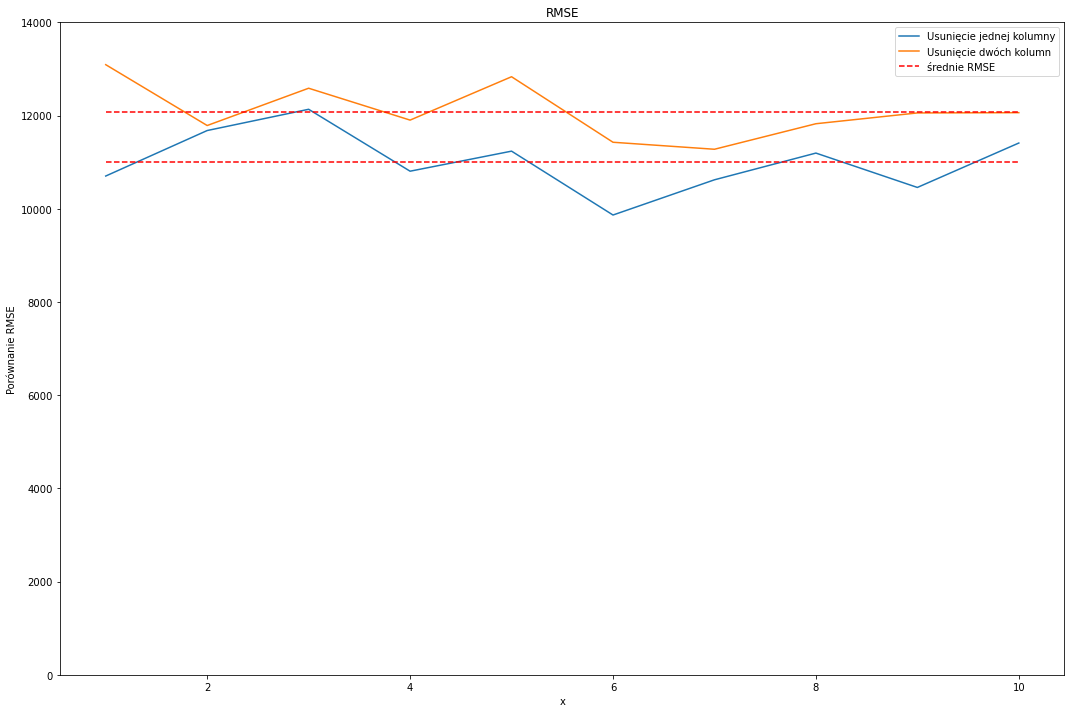

In [62]:
#plt.plot( 'x_axis', 'y_axis', data=df, linestyle='-', marker='o')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,12))
plt.plot(x, RMSE, x, RMSE_2)
plt.plot(x,y_mean,linestyle='--',color = 'red')
plt.plot(x,y_mean_2,linestyle='--',color = 'red')
plt.ylim([0,14000])
plt.legend(["Usunięcie jednej kolumny", "Usunięcie dwóch kolumn","średnie RMSE"])
plt.title("RMSE dla it_seller")
plt.xlabel("x")
plt.ylabel("Porównanie RMSE")
plt.show()

In [63]:
# rozrzut wartości RMSE dla pierwszego eksperymentu
np.max(RMSE)-np.min(RMSE)

2269.104439820596

In [64]:
# rozrzut wartości RMSE dla drugiego eksperymentu
np.max(RMSE_2)-np.min(RMSE_2)

1815.3472668778468

WNIOSKI:
- wartości błędu RMSE dla przypadku gdy usunęliśmy dwie kolumny są większe niż w przypadku usunięcia jednej
- rozrzut wartości błędu RMSE w przypadku usunięcia obu kolumn jest mniejszy ale nie jest to duża różnica i może się zmienaić w zależności od wyboru usuniętych obserwacji